# **Renal Graft Parenchyma Qualitative Assessment Through Fluorescence Angiography Before Kidney Transplantation**
[Article extract](https://www.researchgate.net/publication/344031053_RENAL_GRAFT_PARENCHYMA_QUALITATIVE_ASSESSMENT_THROUGH_FLUORESCENCE_ANGIOGRAPHY_BEFORE_KIDNEY_TRANSPLANTATION)

In [ ]:
import sklearn as sk
import pandas as pd
import numpy as np
from scipy import stats
from scipy.stats import ttest_1samp, wilcoxon, ttest_ind, mannwhitneyu
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [ ]:
df = pd.read_csv("C:/***/sample_parsed.csv"
                      , sep=';'
                      , encoding='utf-8'
                      , decimal =','
                      , error_bad_lines=False)

In [ ]:
df1 = df.drop(['pz'], axis = 1)
df1

,out,indice,m,karpinski,KDPI_perc,KDRI,eta_don,altezza_don,peso_don,eta_ric,...,diabete_ric,Trasfusioni Pre_TX,sim_prec TX extra_renale,Morte_Anossia,HLA,HLA-DR,ischemia_fredda_don,Perfuzione,ATG,dcd
0,no trap,4.72,NaN,7.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,dgf,5.66,NaN,5.0,100.0,2.57,75.0,173.0,74.0,60.0,...,0.0,0.0,0.0,0.0,6.0,2.0,20.0,1.0,1.0,1.0
2,dgf,6.19,NaN,NaN,23.0,0.77,38.0,195.0,106.0,48.0,...,0.0,1.0,0.0,0.0,4.0,1.0,24.0,1.0,1.0,1.0
3,dgf,7.36,NaN,3.0,93.0,1.70,71.0,180.0,65.0,68.0,...,0.0,1.0,0.0,0.0,4.0,1.0,13.2,0.0,0.0,0.0
4,dgf,7.79,NaN,NaN,83.0,1.43,65.0,180.0,65.0,54.0,...,0.0,1.0,0.0,0.0,2.0,1.0,17.0,0.0,0.0,0.0
5,egf,8.02,0.77,2.0,93.0,1.70,71.0,180.0,65.0,70.0,...,0.0,1.0,0.0,0.0,5.0,1.0,19.2,0.0,0.0,0.0
6,egf,8.32,1.06,NaN,20.0,0.75,42.0,180.0,80.0,62.0,...,1.0,1.0,0.0,0.0,6.0,2.0,10.0,0.0,0.0,0.0
7,egf,9.10,1.25,5.0,94.0,1.77,64.0,170.0,100.0,61.0,...,0.0,1.0,0.0,0.0,2.0,1.0,13.5,0.0,1.0,0.0
8,egf,9.88,1.06,NaN,77.0,1.31,59.0,180.0,88.0,34.0,...,0.0,1.0,1.0,0.0,6.0,2.0,13.0,0.0,0.0,0.0
9,egf,12.50,1.46,NaN,72.0,1.23,55.0,155.0,81.0,44.0,...,0.0,0.0,0.0,0.0,3.0,1.0,9.5,0.0,0.0,0.0


## Statistica Descrittiva

### Dataset iniziale (No trapianto + EGF + DGF)


___



Statistica Descrittiva relativa al campione di partenza:

**Legenda:** 
- count : numero di osservazioni per variabile
- mean: media aritmentica
- std: deviazione standard
- min: minimo
- 25%: primo quartile
- 50%: secondo quartile
- 75%: terzo quartile
- max: massimo

In [ ]:
df.describe()

,indice,m,karpinski,KDPI_perc,KDRI,eta_don,altezza_don,peso_don,eta_ric,ipertensione_don,...,diabete_ric,Trasfusioni Pre_TX,sim_prec TX extra_renale,Morte_Anossia,HLA,HLA-DR,ischemia_fredda_don,Perfuzione,ATG,dcd
count,14.000000,9.000000,7.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,...,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000
mean,10.733571,1.565556,4.000000,68.230769,1.381538,58.230769,175.615385,80.076923,55.000000,0.384615,...,0.076923,0.615385,0.076923,0.076923,4.384615,1.461538,14.592308,0.230769,0.384615,0.230769
std,5.105771,0.645854,1.732051,32.565713,0.539241,15.023059,9.570253,14.262197,11.937336,0.506370,...,0.277350,0.506370,0.277350,0.277350,1.445595,0.518875,4.614373,0.438529,0.506370,0.438529
min,4.720000,0.770000,2.000000,2.000000,0.570000,25.000000,155.000000,65.000000,34.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,2.000000,1.000000,9.500000,0.000000,0.000000,0.000000
25%,7.467500,1.060000,3.000000,63.000000,1.130000,55.000000,170.000000,70.000000,48.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,4.000000,1.000000,10.500000,0.000000,0.000000,0.000000
50%,8.710000,1.350000,3.000000,77.000000,1.310000,62.000000,180.000000,75.000000,60.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,4.000000,1.000000,13.200000,0.000000,0.000000,0.000000
75%,13.355000,2.260000,5.000000,93.000000,1.700000,71.000000,180.000000,88.000000,62.000000,1.000000,...,0.000000,1.000000,0.000000,0.000000,6.000000,2.000000,18.000000,0.000000,1.000000,0.000000
max,19.940000,2.550000,7.000000,100.000000,2.570000,75.000000,195.000000,106.000000,70.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,6.000000,2.000000,24.000000,1.000000,1.000000,1.000000


### Early Graft Function

___

Statistica descrittiva relativa al campione **EGF**

In [ ]:
egf = df[df["out"]=="egf"]
egf.describe()

,indice,m,karpinski,KDPI_perc,KDRI,eta_don,altezza_don,peso_don,eta_ric,ipertensione_don,...,diabete_ric,Trasfusioni Pre_TX,sim_prec TX extra_renale,Morte_Anossia,HLA,HLA-DR,ischemia_fredda_don,Perfuzione,ATG,dcd
count,9.000000,9.000000,4.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,...,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000
mean,13.172222,1.565556,3.250000,65.333333,1.276667,56.444444,172.777778,81.222222,53.888889,0.333333,...,0.111111,0.555556,0.111111,0.111111,4.555556,1.555556,12.833333,0.111111,0.333333,0.111111
std,4.779890,0.645854,1.258306,33.098338,0.433042,14.917365,8.700255,12.577537,13.485589,0.500000,...,0.333333,0.527046,0.333333,0.333333,1.424001,0.527046,3.573863,0.333333,0.500000,0.333333
min,8.020000,0.770000,2.000000,2.000000,0.570000,25.000000,155.000000,65.000000,34.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,2.000000,1.000000,9.500000,0.000000,0.000000,0.000000
25%,9.100000,1.060000,2.750000,63.000000,1.130000,55.000000,170.000000,72.000000,44.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,4.000000,1.000000,10.000000,0.000000,0.000000,0.000000
50%,12.500000,1.350000,3.000000,72.000000,1.230000,59.000000,175.000000,80.000000,61.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,5.000000,2.000000,12.000000,0.000000,0.000000,0.000000
75%,18.120000,2.260000,3.500000,93.000000,1.700000,64.000000,180.000000,88.000000,62.000000,1.000000,...,0.000000,1.000000,0.000000,0.000000,6.000000,2.000000,13.500000,0.000000,1.000000,0.000000
max,19.940000,2.550000,5.000000,95.000000,1.800000,73.000000,180.000000,100.000000,70.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,6.000000,2.000000,19.200000,1.000000,1.000000,1.000000


### Delayed Graft Function

___


Statistica descrittiva relativa al campione **DGF**

In [ ]:
dgf = df[df["out"]=="dgf"]
#dgf.to_csv('C:/Users/giacomo.gaglione/Desktop/BRUS/saving_test.csv', index=True)
dgf.describe()

,indice,m,karpinski,KDPI_perc,KDRI,eta_don,altezza_don,peso_don,eta_ric,ipertensione_don,...,diabete_ric,Trasfusioni Pre_TX,sim_prec TX extra_renale,Morte_Anossia,HLA,HLA-DR,ischemia_fredda_don,Perfuzione,ATG,dcd
count,4.000000,0.0,2.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.00000,...,4.0,4.00,4.0,4.0,4.000000,4.00,4.000000,4.00000,4.00000,4.00000
mean,6.750000,NaN,4.000000,74.750000,1.617500,62.250000,182.000000,77.500000,57.500000,0.50000,...,0.0,0.75,0.0,0.0,4.000000,1.25,18.550000,0.50000,0.50000,0.50000
std,0.992539,NaN,1.414214,35.198248,0.745537,16.680827,9.273618,19.467922,8.544004,0.57735,...,0.0,0.50,0.0,0.0,1.632993,0.50,4.576389,0.57735,0.57735,0.57735
min,5.660000,NaN,3.000000,23.000000,0.770000,38.000000,173.000000,65.000000,48.000000,0.00000,...,0.0,0.00,0.0,0.0,2.000000,1.00,13.200000,0.00000,0.00000,0.00000
25%,6.057500,NaN,3.500000,68.000000,1.265000,58.250000,178.250000,65.000000,52.500000,0.00000,...,0.0,0.75,0.0,0.0,3.500000,1.00,16.050000,0.00000,0.00000,0.00000
50%,6.775000,NaN,4.000000,88.000000,1.565000,68.000000,180.000000,69.500000,57.000000,0.50000,...,0.0,1.00,0.0,0.0,4.000000,1.00,18.500000,0.50000,0.50000,0.50000
75%,7.467500,NaN,4.500000,94.750000,1.917500,72.000000,183.750000,82.000000,62.000000,1.00000,...,0.0,1.00,0.0,0.0,4.500000,1.25,21.000000,1.00000,1.00000,1.00000
max,7.790000,NaN,5.000000,100.000000,2.570000,75.000000,195.000000,106.000000,68.000000,1.00000,...,0.0,1.00,0.0,0.0,6.000000,2.00,24.000000,1.00000,1.00000,1.00000


##  Grafici Comparati

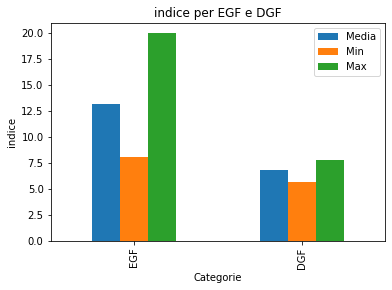

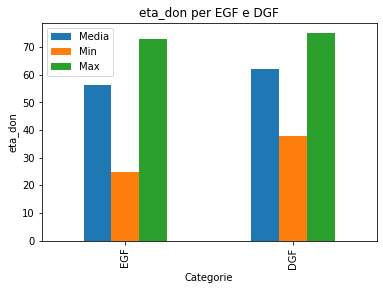

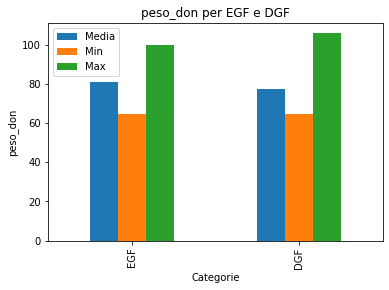

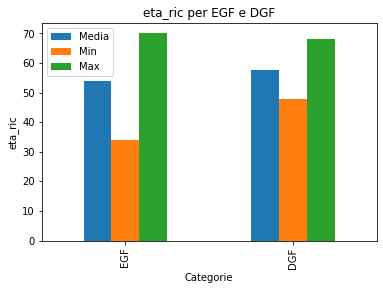

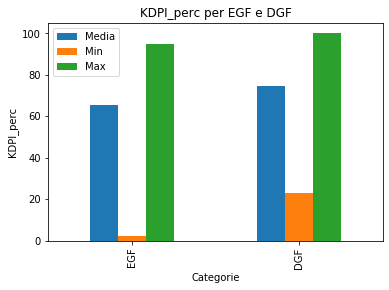

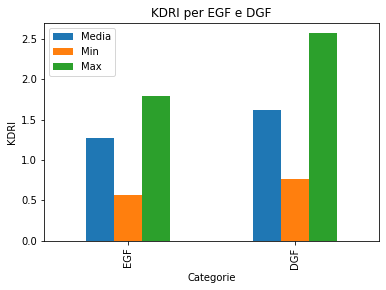

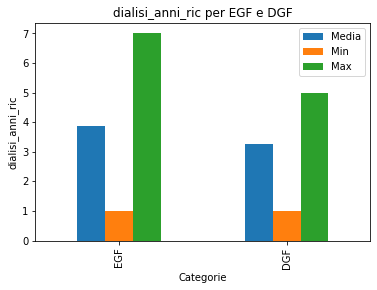

In [ ]:
lista = ['indice', 'eta_don', 'peso_don', 'eta_ric', 'KDPI_perc', 'KDRI', 'dialisi_anni_ric']
      
for i in lista:    	
    groups = [egf[i], dgf[i]]
    group_labels = ['EGF', 'DGF']

    df = pd.DataFrame(groups, index=group_labels).T

    pd.concat(
        [df.mean().rename('Media'), df.min().rename('Min'), 
         df.max().rename('Max')],
        axis=1).plot.bar()
    
    plt.title(i + ' per EGF e DGF')
    plt.xlabel('Categorie')
    plt.ylabel(i)

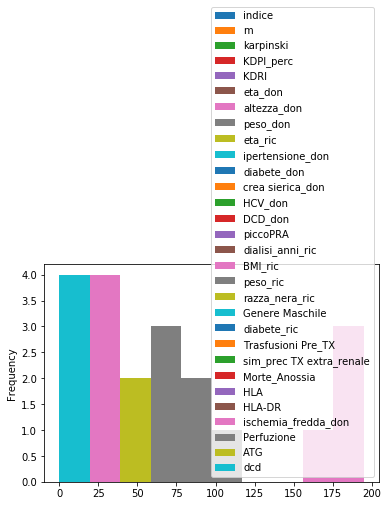

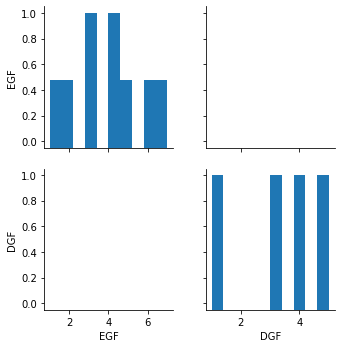

In [ ]:
bx = dgf.plot.hist('eta_ric')
sns.pairplot(df.loc[:,df.dtypes == 'float64'])


## End Point 1
### Mann–Whitney *U* test
---




- Test non parametrico dell'ipotesi nulla 
- P Value < 0.005 ipotesi nulla rigettata

In [ ]:
lista = ['indice'
         ,'karpinski'
         , 'eta_don'
         , 'peso_don'
         , 'eta_ric'
         , 'piccoPRA'
         , 'dialisi_anni_ric'
         , 'BMI_ric'
         , 'peso_ric'
         , 'ipertensione_don'
         , 'HLA'
         , 'HLA-DR'
         , 'razza_nera_ric'
         , 'diabete_ric'
         , 'diabete_don'
         , 'DCD_don'
         , 'crea sierica_don'
         , 'ATG'
         , 'ischemia_fredda_don']

for i in lista:    
    dgf_i = dgf[i]
    egf_i = egf[i]   
    u_statistic, pVal = stats.mannwhitneyu(dgf_i, egf_i)            
    print ('\nVariabile:', i ,'\nP value:', pVal, '\nU Statistic:', u_statistic, '\n-------------------------------' )


Variabile: indice 
P value: 0.0034637589886132533 
U Statistic: 0.0 
-------------------------------

Variabile: karpinski 
P value: 0.26713643881303584 
U Statistic: 13.5 
-------------------------------

Variabile: eta_don 
P value: 0.17693874692179512 
U Statistic: 11.5 
-------------------------------

Variabile: peso_don 
P value: 0.24221859728003842 
U Statistic: 13.0 
-------------------------------

Variabile: eta_ric 
P value: 0.4691667874841462 
U Statistic: 17.0 
-------------------------------

Variabile: piccoPRA 
P value: 0.30853753872598694 
U Statistic: 16.0 
-------------------------------

Variabile: dialisi_anni_ric 
P value: 0.347836162245574 
U Statistic: 15.0 
-------------------------------

Variabile: BMI_ric 
P value: 0.46925144238923566 
U Statistic: 18.0 
-------------------------------

Variabile: peso_ric 
P value: 0.40835692591565953 
U Statistic: 16.0 
-------------------------------

Variabile: ipertensione_don 
P value: 0.32403843406957306 
U Statistic

## End Point 2
___

## Correlazione Indice - m
### Spearman Test 


 - Test **non parametrico** che misura la correlazione tra variabile indipendente e variabile dipendente.
 - Valori ammessi da -1 a +1
 - +1 --> correlazione perfetta.
 - Se il valore della correlazione è positiva allora al crescere di una variabile crescerà anche la seconda. 
 
 
 **IL TEST E' COMPIUTO SOLO PER I PAZIENTI EGF**
 

In [ ]:
correlation, pVal = stats.spearmanr(egf['indice'], egf['m'])
print('\nRisultati Spearman tra indice e m', '\nCorrelazione:', correlation, '\nPValue:', pVal)


Risultati Spearman tra indice e m 
Correlazione: 0.9372466978064098 
PValue: 0.00019163134226574257


### Pearson
 - Indice che esprime il grado di correlazione **lineare** tra due variabili
 - Valori ammessi da -1 a +1
 - +1 --> perfetta correlazione lineare positiva.
 - -1 --> perfetta correlazione lineare negativa.
 - Se la correlazione è positiva allora al crescere di una variabile crescerà anche la seconda. 
 

In [ ]:
correlation, pVal = stats.pearsonr(egf['indice'], egf['m'])
print('\nRisultati Pearson','\nCorrelazione:', correlation, '\nPValue:', pVal)


Risultati Pearson 
Correlazione: 0.9656147473967367 
PValue: 2.4001099157686744e-05


### Grafico Indice - m


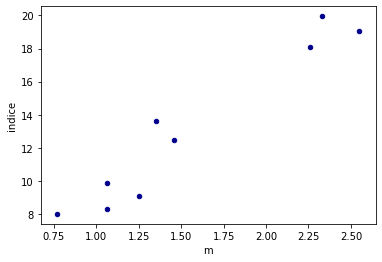

In [ ]:
egf.plot.scatter(x='m'
                 , y='indice'
                 , c='DarkBlue')

## EndPoint 3A - Correlazione Indice-Karpinski (campione intero)

- Estraggo dal campione le variabili:
- out 
- pz
- indice 
- karpinski



In [ ]:
end3 = df[['out', 'pz', 'indice', 'karpinski']]

In [ ]:
end3

,out,pz,indice,karpinski
0,no trap,rene_buttato,4.72,7.0
1,dgf,raaka,5.66,5.0
2,dgf,khan,6.19,NaN
3,dgf,aiani,7.36,3.0
4,dgf,lucchini,7.79,NaN
5,egf,d'angelo,8.02,2.0
6,egf,ciullo,8.32,NaN
7,egf,colombo,9.10,5.0
8,egf,pisciotta,9.88,NaN
9,egf,bianchi,12.50,NaN


**Esclusione dei valori mancanti dalla variabile karpinski, il campione si riduce dunque a:**
- 7 in totale
- 1 non trapiantato
- 2 GDF
- 4 EGF

In [ ]:
end3_notnull = end3[end3.karpinski.notnull()]
end3_notnull

,out,pz,indice,karpinski
0,no trap,rene_buttato,4.72,7.0
1,dgf,raaka,5.66,5.0
3,dgf,aiani,7.36,3.0
5,egf,d'angelo,8.02,2.0
7,egf,colombo,9.10,5.0
11,egf,palmulli,18.12,3.0
13,egf,spinelli,19.94,3.0


- Entrambi i test (Spearman (non-lineare) e Pearson (lineare)) suggeriscono una correlazione negativa tra le variabile indice e karpinski.

- Presentano entrambi pValue **statisticamente non significativi**


In [ ]:
correlation, pVal = stats.spearmanr(end3_notnull['indice'], end3_notnull['karpinski'])
print('\nRisultati Spearman Endpoint 3A:', '\nCorrelazione:', correlation, '\nPValue:', pVal)


Risultati Spearman Endpoint 3A: 
Correlazione: -0.5426488617097118 
PValue: 0.2081851760215384


Il test di Pearson presenta un PValue troppo alto e non si trova significatività statistica rilevante di correlazione lineare tra le variabili indice e karpinski


In [ ]:
correlation, pVal = stats.pearsonr(end3_notnull['indice'], end3_notnull['karpinski'])
print('\nRisultati Pearson EndPoint 3A','\nCorrelazione:', correlation, '\nPValue:', pVal)


Risultati Pearson EndPoint 3A 
Correlazione: -0.5148366214227523 
PValue: 0.23705458236443727


## ENDPOINT 3B - Correlazione Indice - karpinski (esclusi gli ouliers)
**NB: In questa fase sono scartati i valori relativi alla variabile KARPINSKI di D'Angelo e Aiani , considerati in questa analisi *outliers***

Campione Endpoint3b:

In [ ]:
end3_scartati = end3_notnull[end3_notnull["pz"]!="d'angelo"]
end3_scartati = end3_scartati[end3_scartati["pz"]!="aiani"]
end3_scartati

,out,pz,indice,karpinski
0,no trap,rene_buttato,4.72,7.0
1,dgf,raaka,5.66,5.0
7,egf,colombo,9.10,5.0
11,egf,palmulli,18.12,3.0
13,egf,spinelli,19.94,3.0


#### Risultati

In [ ]:
correlation, pVal = stats.spearmanr(end3_scartati['indice'], end3_scartati['karpinski'])
print('\nRisultati Spearman Endpoint 3B:', '\nCorrelazione:', correlation, '\nPValue:', pVal)


Risultati Spearman Endpoint 3B: 
Correlazione: -0.9486832980505138 
PValue: 0.013846832988859059


In [ ]:
correlation, pVal = stats.pearsonr(end3_scartati['indice'], end3_scartati['karpinski'])
print('\nRisultati Pearson EndPoint 3B','\nCorrelazione:', correlation, '\nPValue:', pVal)


Risultati Pearson EndPoint 3B 
Correlazione: -0.9205206419488188 
PValue: 0.02657473126882828


# ENDPOINT 4
## Relazione Indice - KDPI

In [ ]:
end4 = df[df["pz"]!= "rene_buttato"]
end4

,out,pz,indice,m,karpinski,KDPI_perc,KDRI,eta_don,altezza_don,peso_don,...,diabete_ric,Trasfusioni Pre_TX,sim_prec TX extra_renale,Morte_Anossia,HLA,HLA-DR,ischemia_fredda_don,Perfuzione,ATG,dcd
1,dgf,raaka,5.66,NaN,5.0,100.0,2.57,75.0,173.0,74.0,...,0.0,0.0,0.0,0.0,6.0,2.0,20.0,1.0,1.0,1.0
2,dgf,khan,6.19,NaN,NaN,23.0,0.77,38.0,195.0,106.0,...,0.0,1.0,0.0,0.0,4.0,1.0,24.0,1.0,1.0,1.0
3,dgf,aiani,7.36,NaN,3.0,93.0,1.70,71.0,180.0,65.0,...,0.0,1.0,0.0,0.0,4.0,1.0,13.2,0.0,0.0,0.0
4,dgf,lucchini,7.79,NaN,NaN,83.0,1.43,65.0,180.0,65.0,...,0.0,1.0,0.0,0.0,2.0,1.0,17.0,0.0,0.0,0.0
5,egf,d'angelo,8.02,0.77,2.0,93.0,1.70,71.0,180.0,65.0,...,0.0,1.0,0.0,0.0,5.0,1.0,19.2,0.0,0.0,0.0
6,egf,ciullo,8.32,1.06,NaN,20.0,0.75,42.0,180.0,80.0,...,1.0,1.0,0.0,0.0,6.0,2.0,10.0,0.0,0.0,0.0
7,egf,colombo,9.10,1.25,5.0,94.0,1.77,64.0,170.0,100.0,...,0.0,1.0,0.0,0.0,2.0,1.0,13.5,0.0,1.0,0.0
8,egf,pisciotta,9.88,1.06,NaN,77.0,1.31,59.0,180.0,88.0,...,0.0,1.0,1.0,0.0,6.0,2.0,13.0,0.0,0.0,0.0
9,egf,bianchi,12.50,1.46,NaN,72.0,1.23,55.0,155.0,81.0,...,0.0,0.0,0.0,0.0,3.0,1.0,9.5,0.0,0.0,0.0
10,egf,meyanciuc,13.64,1.35,NaN,2.0,0.57,25.0,180.0,75.0,...,0.0,0.0,0.0,1.0,4.0,2.0,10.5,0.0,0.0,0.0


In [ ]:
correlation, pVal = stats.spearmanr(end4['indice'], end4['KDPI_perc'])
print('\nRisultati Spearman Endpoint 4:', '\nCorrelazione:', correlation, '\nPValue:', pVal)


Risultati Spearman Endpoint 4: 
Correlazione: -0.21763167980364392 
PValue: 0.4750727787911654


## Correlazione: INDICE - KDRI


In [ ]:
correlation, pVal = stats.spearmanr(end4['indice'], end4['KDRI'])
print('\nRisultati Spearman Endpoint 4:', '\nCorrelazione:', correlation, '\nPValue:', pVal)


Risultati Spearman Endpoint 4: 
Correlazione: -0.21763167980364392 
PValue: 0.4750727787911654
